In [1]:
from keras.models import Sequential

In [2]:
from keras.layers import Conv2D

In [3]:
from keras.layers import MaxPooling2D

In [4]:
from keras.layers import Flatten

In [5]:
from keras.layers import Dense

In [6]:
import matplotlib.pyplot as plt

In [7]:
classifier = Sequential()

In [8]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [9]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [10]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

In [11]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [12]:
classifier.add(Flatten())

In [13]:
classifier.add(Dense(units = 128, activation = 'relu'))

In [14]:
classifier.add(Dense(units = 2, activation = 'sigmoid'))

In [15]:
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

In [18]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
training_set = train_datagen.flow_from_directory('D:\\CNN\\Mangoes\\Train Data',
                                                 target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 573 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory('D:\\CNN\\Mangoes\\Test Data',
                                            target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 61 images belonging to 2 classes.


In [21]:
classifier.fit(training_set,
steps_per_epoch = 20,
epochs = 5,
validation_data = test_set,
validation_steps = 20)

Epoch 1/5
20/20 [==============================] - 11s 504ms/step - loss: 0.4593 - accuracy: 0.7888 - val_loss: 0.1972 - val_accuracy: 0.9508


In [22]:
import numpy as np

In [23]:
from keras.preprocessing import image

In [24]:
#img = image.load_img(val_img_file, target_size=(224, 224))
#print(type(img))

1/1 [==============================] - 0s 19ms/step
stage1 : 0.0
stage2 : 1.0
Mangoes are currently in stage2.
------------------------------------------------------------
Expected to ripe in next 5-10 days
------------------------------------------------------------


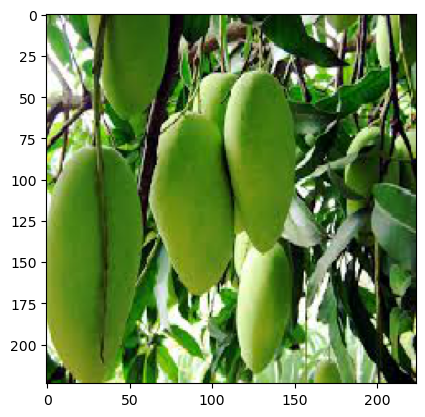

In [41]:
val_img_file = 'D:\\CNN\\Mangoes\\Validation Data\\download (4).jpg'
test_image = image.load_img(val_img_file, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
class_dict = {0:'stage1', 1 : 'stage2', 2 : 'stage3', 3 : 'stage4'}
days_dict = {0:'0-5', 1 : '5-10', 2 : '10-15', 3 : '15-20'}
[print(class_dict[i],':', round(result[0][i], 3)) for i in range(len(result[0]))]
training_set.class_indices
print('Mangoes are currently in {}.'.format(class_dict[np.argmax(result)]))
arg_max = np.argmax(result)
print(60*'-')
if arg_max < 3:
  print('Expected to ripe in next {} days'.format(days_dict[arg_max]))
else:
  print('Already riped! or Expected to ripe in next {} days'.format(days_dict[arg_max]))
print(60*'-')

img = image.load_img(val_img_file, target_size=(224, 224))
x = image.img_to_array(img)
plt.imshow(x/255.)